In [87]:
import pandas as pd
import numpy as np 
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
path = "D:/MCGILL-DATA SCIENCE/YCBS-299-PRJ/data/jjycleaned/2015-2019/"

## Importing dataset and summary statistics

In [2]:
model2 = path + "model2.csv"
model2= pd.read_csv(model2)
model2.head()

,YEAR,RISK_LVL,Revenu moyen ($),Population_Density,NOMBRE_LOGEMENT,Average_Age,Avg_members_family,renters_%,Population Immigrants,"Aucun certificat, diplôme ou grade",MONTH,DAY,QUART_jour,QUART_nuit,QUART_soir
0,2019,Low,51488,1665.605,1.404,45.3,3.0,0.297,0.264,0.098,1,7,1,0,0
1,2019,Low,51488,1665.605,1.404,45.3,3.0,0.297,0.264,0.098,1,11,1,0,0
2,2019,Low,51488,1665.605,1.404,45.3,3.0,0.297,0.264,0.098,9,27,0,0,1
3,2019,Low,51488,1665.605,1.404,45.3,3.0,0.297,0.264,0.098,9,27,0,0,1
4,2019,Low,51488,1665.605,1.404,45.3,3.0,0.297,0.264,0.098,1,18,0,0,1


In [3]:
model2.groupby(['RISK_LVL']).mean()

,YEAR,Revenu moyen ($),Population_Density,NOMBRE_LOGEMENT,Average_Age,Avg_members_family,renters_%,Population Immigrants,"Aucun certificat, diplôme ou grade",MONTH,DAY,QUART_jour,QUART_nuit,QUART_soir
RISK_LVL,,,,,,,,,,,,,,
High,2016.771759,43099.366954,6167.925123,2.487918,40.391999,2.637171,0.695524,0.289610,0.137842,6.706936,15.527199,0.499547,0.148232,0.352221
Low,2017.098799,49932.676158,3919.197205,1.928931,41.421681,2.947170,0.483140,0.302900,0.155225,6.602401,15.716981,0.451458,0.195883,0.352659
Medium,2017.113748,37927.912880,7367.512126,2.729345,39.429493,2.868075,0.679050,0.316909,0.154436,6.501302,15.578003,0.501302,0.151664,0.347033


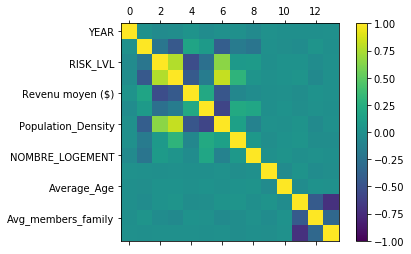

In [4]:
correlations = model2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names = ['']+list(model2)

ax.set_yticklabels(names)
plt.show();

In [5]:
correlations

,YEAR,Revenu moyen ($),Population_Density,NOMBRE_LOGEMENT,Average_Age,Avg_members_family,renters_%,Population Immigrants,"Aucun certificat, diplôme ou grade",MONTH,DAY,QUART_jour,QUART_nuit,QUART_soir
YEAR,1.000000,0.012708,-0.033791,-0.018483,0.024370,-0.025652,0.001508,0.000202,-0.046385,0.010707,-0.001445,-0.003712,-0.000378,0.004180
Revenu moyen ($),0.012708,1.000000,-0.211167,-0.443591,0.171553,0.092508,-0.402997,-0.169350,-0.220788,0.005952,-0.014040,-0.028423,0.038952,-0.000320
Population_Density,-0.033791,-0.211167,1.000000,0.772433,-0.527277,-0.261927,0.649319,0.073005,0.092386,-0.005261,0.020634,0.020170,-0.028696,0.001042
NOMBRE_LOGEMENT,-0.018483,-0.443591,0.772433,1.000000,-0.432624,-0.161732,0.826744,0.300893,0.036407,0.007029,0.018994,0.031425,-0.048825,0.004803
Average_Age,0.024370,0.171553,-0.527277,-0.432624,1.000000,0.208718,-0.465616,-0.075695,-0.028721,-0.005552,0.001829,-0.022679,0.020849,0.007649
Avg_members_family,-0.025652,0.092508,-0.261927,-0.161732,0.208718,1.000000,-0.584956,0.212895,0.180144,-0.003349,0.017220,-0.009248,0.013128,-0.000455
renters_%,0.001508,-0.402997,0.649319,0.826744,-0.465616,-0.584956,1.000000,0.138485,-0.112410,0.008772,0.003703,0.028310,-0.045357,0.005386
Population Immigrants,0.000202,-0.169350,0.073005,0.300893,-0.075695,0.212895,0.138485,1.000000,0.069541,-0.013564,0.022092,0.031269,-0.020826,-0.016664
"Aucun certificat, diplôme ou grade",-0.046385,-0.220788,0.092386,0.036407,-0.028721,0.180144,-0.112410,0.069541,1.000000,0.002598,0.029311,-0.006022,0.015317,-0.005526
MONTH,0.010707,0.005952,-0.005261,0.007029,-0.005552,-0.003349,0.008772,-0.013564,0.002598,1.000000,-0.033724,0.028606,-0.023950,-0.011461


## Set Y and X space, split dataset in train(60%), validate(20%) and test(20%)

In [6]:
train, validate, test = np.split(model2.sample(frac=1), [int(.6*len(model2)), int(.8*len(model2))])

In [7]:
train['YEAR'].value_counts()
validate['YEAR'].value_counts()
test['YEAR'].value_counts()

2017    1399
2015    1363
2016    1272
2019    1252
2018    1183
Name: YEAR, dtype: int64

2017    434
2015    432
2016    431
2019    430
2018    429
Name: YEAR, dtype: int64

2016    456
2017    450
2019    426
2018    415
2015    410
Name: YEAR, dtype: int64

In [8]:
y_train = train['RISK_LVL']
X_train= train.drop(columns=['RISK_LVL'], inplace=False)
X_train
y_train

,YEAR,Revenu moyen ($),Population_Density,NOMBRE_LOGEMENT,Average_Age,Avg_members_family,renters_%,Population Immigrants,"Aucun certificat, diplôme ou grade",MONTH,DAY,QUART_jour,QUART_nuit,QUART_soir
9901,2018,43128,12792.128,2.878,37.4,2.6,0.724,0.251,0.186,11,20,0,1,0
861,2019,36709,5353.168,2.522,41.2,2.7,0.656,0.210,0.199,5,22,0,0,1
115,2018,51768,7125.991,2.175,41.4,2.7,0.629,0.242,0.138,9,12,0,0,1
9825,2017,43128,12792.128,2.878,37.4,2.6,0.724,0.251,0.186,10,16,0,0,1
1868,2016,36709,5353.168,2.522,41.2,2.7,0.656,0.210,0.199,9,24,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,2016,40602,5556.498,2.359,41.6,3.0,0.608,0.404,0.175,2,26,0,0,1
10772,2019,114120,3904.255,1.468,40.1,3.3,0.331,0.284,0.072,4,3,1,0,0
2008,2018,40881,4984.120,2.062,38.9,2.7,0.658,0.252,0.132,3,10,1,0,0
7695,2016,30824,8723.651,2.949,38.3,2.9,0.722,0.422,0.258,5,22,1,0,0


9901        Low
861        High
115         Low
9825     Medium
1868       High
          ...  
4124       High
10772       Low
2008        Low
7695       High
8915        Low
Name: RISK_LVL, Length: 6469, dtype: object

In [9]:
y_validate = validate['RISK_LVL']
X_validate= validate.drop(columns=['RISK_LVL'], inplace=False)

y_test = test['RISK_LVL']
X_test= test.drop(columns=['RISK_LVL'], inplace=False)

## Run a baseline model without tuning

**Tree specific parameters**  
   n_estimators=5 (number of trees)  
   max_depth=3  
   min_samples_split=2  
   min_samples_leaf=1  
   subsample=1.0  

**Other Parameters**  
   learning_rate=0.1 (shrinkage)  
   subsample: 1  

Accuracy of the GBM on validate set: 0.865
              precision    recall  f1-score   support

        High       0.83      0.96      0.89       869
         Low       1.00      0.85      0.92       592
      Medium       0.81      0.75      0.78       695

    accuracy                           0.87      2156
   macro avg       0.88      0.86      0.86      2156
weighted avg       0.87      0.87      0.86      2156



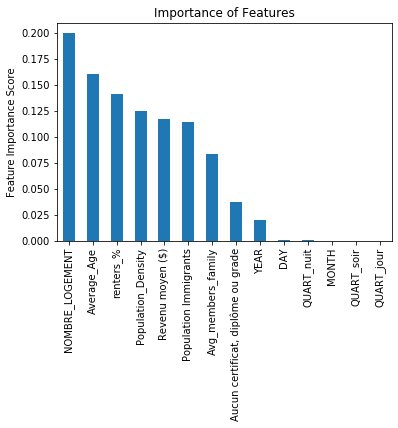

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=5, max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on validate set: {:.3f}'.format(baseline.score(X_validate, y_validate)))
val=baseline.predict(X_validate)
print(classification_report(y_validate, val));

The plot displays the importance of the feature: The NOMBRE_LOGEMENT , Average_Age and renters_% seem to have the highest predictive power.

With this first model, we obtain a rate of 0.83 of true positives (positive meaning High risk level) and an accuracy of 0.88.

## Tuning parameters 
Many strategies exist on how to tune parameters. We will mainly focus on number of trees, tree depth and the learning rate as the most crucial parameters.

Hence, we will start off with these three.
We use 5-fold cross validation and evaluate models based on accuracy.(cv=5)

   **Tunign n_estimators and Learning rate**  
n_estimators captures the number of trees that we add to the model. A high number of trees can be computationally expensive. Generally, with a change in learning rate,n_estimators should also be adjusted.

In [15]:
# Calculate the running time
from datetime import datetime
start_time = datetime.now()

from sklearn.model_selection import GridSearchCV

p_test1 = {'learning_rate':[0.02,0.1,0.08,0.05,0.03,0.01], 'n_estimators':[3,5,8,10,12]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_


end_time = datetime.now()
print('Total running time of this model: {}'.format(end_time - start_time))

D:\anacoda\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
       

({'mean_fit_time': array([0.05996523, 0.09034829, 0.13212423, 0.15871029, 0.19129066,
         0.05776744, 0.08954983, 0.13812189, 0.16850581, 0.19668798,
         0.05876756, 0.09034772, 0.13192434, 0.16130791, 0.19608822,
         0.05856676, 0.09034786, 0.12872596, 0.16350574, 0.1920908 ,
         0.05696788, 0.08615174, 0.13412395, 0.17829809, 0.21827545,
         0.07235827, 0.11633348, 0.16350632, 0.19388924, 0.19268999]),
  'std_fit_time': array([0.00268211, 0.00545871, 0.00702152, 0.00203824, 0.00630804,
         0.00116533, 0.00272624, 0.00664096, 0.00854095, 0.00305724,
         0.00324788, 0.00578016, 0.00227887, 0.00422139, 0.01145488,
         0.00101897, 0.0052362 , 0.00074934, 0.00614592, 0.00348527,
         0.00063166, 0.00330904, 0.00670186, 0.01022392, 0.02911465,
         0.00926062, 0.01070111, 0.01043644, 0.03342955, 0.04641222]),
  'mean_score_time': array([0.00699563, 0.00599599, 0.00619626, 0.00579572, 0.00899439,
         0.00519681, 0.00619578, 0.00659537, 0.

Total running time of this model: 0:00:05.672795


   **max_depth**  
max_depth bounds the maximum depth of the tree. We can use the obtained results to tune the max_depth parameter.

In [16]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,n_estimators=12, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

D:\anacoda\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=12,
                                                  n_iter_no_change=None,
        

({'mean_fit_time': array([0.15970807, 0.19389172, 0.22846885, 0.27384295, 0.33001103,
         0.35379767]),
  'std_fit_time': array([0.00231381, 0.00629019, 0.00515854, 0.00468679, 0.01093679,
         0.04306588]),
  'mean_score_time': array([0.01019392, 0.00659351, 0.00679522, 0.00699553, 0.00839477,
         0.00719557]),
  'std_score_time': array([5.87522975e-03, 4.92172143e-04, 3.99733087e-04, 4.90933902e-07,
         4.89745710e-04, 7.47474568e-04]),
  'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'split0_test_score': array([0.8755796 , 0.90417311, 0.91112828, 0.92581144, 0.97604328,
         0.98531685]),
  'split1_test_score': array([0.85007728, 0.89489954, 0.89644513, 0.9072643 , 0.95517774,
         0.96445131])

## Evaluation of new model on validate set

Accuracy of the GBM on validate set: 0.985
              precision    recall  f1-score   support

        High       0.98      1.00      0.99       869
         Low       1.00      0.98      0.99       592
      Medium       0.98      0.97      0.98       695

    accuracy                           0.98      2156
   macro avg       0.99      0.98      0.98      2156
weighted avg       0.98      0.98      0.98      2156



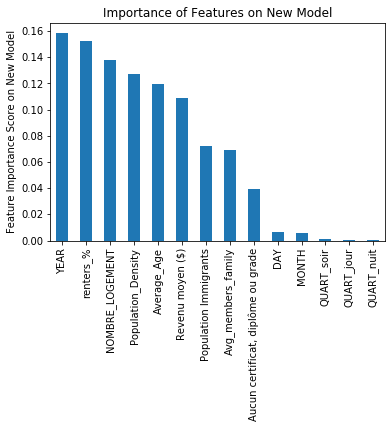

In [17]:
model1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=12,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
feat_imp_model1 = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp_model1.plot(kind='bar', title='Importance of Features on New Model')
plt.ylabel('Feature Importance Score on New Model')
print('Accuracy of the GBM on validate set: {:.3f}'.format(model1.score(X_validate, y_validate)))
val=model1.predict(X_validate)
print(classification_report(y_validate, val));

   The model's performance did improve with the tuning. The "true positive" and the "true negative" rate improved.  
   Worth to notice that the rank of the features has changed. Now, Year and renter_% ranked the top 2.

## Comparison the two models on test data

In [116]:
# baseline model
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=5, max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)

print('Accuracy of the GBM on Baseline Model: {:.3f}'.format(baseline.score(X_test, y_test)))
test_base=baseline.predict(X_test)
print(classification_report(y_test, test_base));

# new model
model1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=12,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)

print('Accuracy of the GBM on New Model: {:.3f}'.format(model1.score(X_test, y_test)))
test_model1=model1.predict(X_test)
print(classification_report(y_test, test_model1));

Accuracy of the GBM on Baseline Model: 0.847
              precision    recall  f1-score   support

        High       0.81      0.96      0.88       861
         Low       1.00      0.84      0.91       578
      Medium       0.80      0.73      0.76       718

    accuracy                           0.85      2157
   macro avg       0.87      0.84      0.85      2157
weighted avg       0.86      0.85      0.85      2157

Accuracy of the GBM on New Model: 0.983
              precision    recall  f1-score   support

        High       0.98      1.00      0.99       861
         Low       1.00      0.96      0.98       578
      Medium       0.97      0.98      0.97       718

    accuracy                           0.98      2157
   macro avg       0.98      0.98      0.98      2157
weighted avg       0.98      0.98      0.98      2157



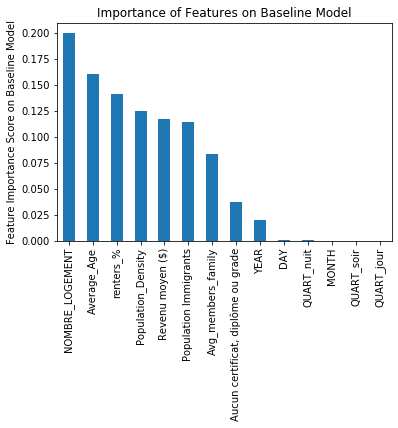

In [39]:
predictors_base=list(X_train)
feat_imp_base = pd.Series(baseline.feature_importances_, predictors_base).sort_values(ascending=False)
feat_imp_base.plot(kind='bar', title='Importance of Features on Baseline Model')
plt.ylabel('Feature Importance Score on Baseline Model');

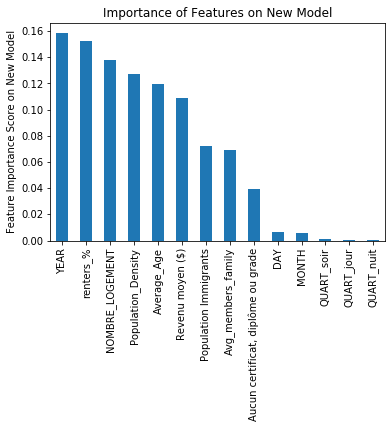

In [37]:
predictors_model1=list(X_train)
feat_imp_model1 = pd.Series(model1.feature_importances_, predictors_model1).sort_values(ascending=False)
feat_imp_model1.plot(kind='bar', title='Importance of Features on New Model')
plt.ylabel('Feature Importance Score on New Model');

In [114]:
print('Feature Importance Score on Baseline Model:')
feat_imp_base.round(decimals=5)

Feature Importance Score on Baseline Model:


NOMBRE_LOGEMENT                       0.19979
Average_Age                           0.16083
renters_%                             0.14094
Population_Density                    0.12525
Revenu moyen ($)                      0.11745
Population Immigrants                 0.11472
Avg_members_family                    0.08373
Aucun certificat, diplôme ou grade    0.03696
YEAR                                  0.02010
DAY                                   0.00015
QUART_nuit                            0.00008
MONTH                                 0.00000
QUART_soir                            0.00000
QUART_jour                            0.00000
dtype: float64

In [115]:
print('Feature Importance Score on New Model:')
feat_imp_model1

Feature Importance Score on New Model:


YEAR                                  0.158189
renters_%                             0.152630
NOMBRE_LOGEMENT                       0.137846
Population_Density                    0.127405
Average_Age                           0.119796
Revenu moyen ($)                      0.108880
Population Immigrants                 0.072070
Avg_members_family                    0.069267
Aucun certificat, diplôme ou grade    0.039568
DAY                                   0.006882
MONTH                                 0.005517
QUART_soir                            0.000845
QUART_jour                            0.000692
QUART_nuit                            0.000414
dtype: float64